Data shape: (100, 2)
The first few lines of data: [[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


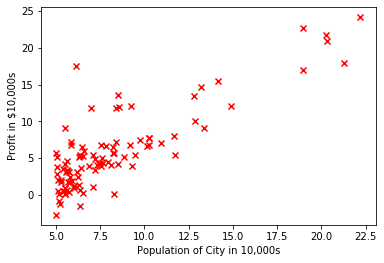

Number of examples: 100
Shape of data     : (100, 1)
Shape of labels   : (100, 1)


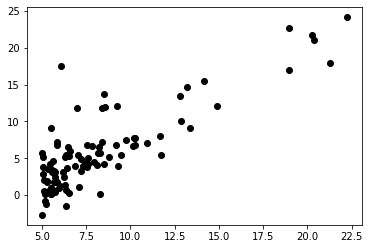

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# use the correct path to where you saved the foodtruck data file
data = pd.read_csv('foodtruck_profits.txt', delimiter=',', header=None).values
print("Data shape: {}".format(data.shape))
print('The first few lines of data: {}'.format(data[0:5,:]))


# create a scatter plot using matplot
plt.scatter(data[:,0],data[:,1], color="red", marker="x",)
# add x and y axis labels
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()


# add a variable and find the length of the data
m = len(data)

# we change the one-dimensional data into a matrix form 
X = np.matrix(data[:,0]).T
y = np.matrix(data[:,1]).T

print("Number of examples: {}".format(m))
print("Shape of data     : {}".format(X.shape))
print("Shape of labels   : {}".format(y.shape))

plt.plot(X,y,'ok')
plt.show()

New shape of data: (100, 2)
(2, 1)
[[-3.95911545]
 [ 1.19673809]]


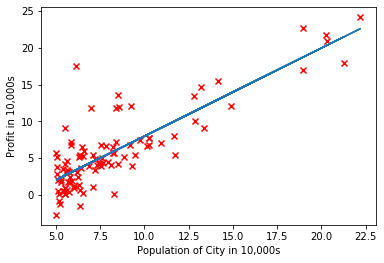

Start by finding the y value at x = 17.5: [[16.98380112]]
For a population of 175,000, we predict a profit of: [[169838.01]]


In [11]:
# add intercept term to data X
X = np.c_[np.ones(m), X] #np.c_ helps in appending columns

print("New shape of data: {}".format(X.shape))


# Closed form solution

#Compute inverse of (Xtranspose * X)
temp1 = np.linalg.pinv(np.dot(X.T,X))

#Computer Xtranspose * y
temp2 = np.dot(X.T,y)

W = np.dot(temp1,temp2)
print (W.shape)
print (W)

plt.scatter(data[:,0],data[:,1], color="red", marker="x",)
plt.plot(X[:,1], np.dot(X,W)) #regression line

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in 10,000s')

plt.show()

# 17.5 x 10,000 = 175,000 population so we use x = 17.5
predicted_profit = np.dot([1,17.5], W)
# Predicted profit needs to be multiplied by y units, 10,000, and rounded to be currency
print ("Start by finding the y value at x = 17.5: {}".format(predicted_profit))
# multiply by 10,000 because that's the y unit
multiplied_profit = predicted_profit * 10000           
# round to two decimal places so it looks like money
final_profit = np.around(multiplied_profit, decimals = 2)
print ("For a population of 175,000, we predict a profit of: {}".format(final_profit))




In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

my_dataframe = pd.read_csv('Advertising.csv') 
feature_cols = ['TV', 'Radio', 'Newspaper']
X = my_dataframe[feature_cols].values
y = my_dataframe.Sales.values

print (X.shape)
print (y.shape)

print(type(X))
print(type(y))


Xtrain = X[:140]
ytrain = y[:140]

Xtest = X[140:]
ytest = y[140:]

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)


(200, 3)
(200,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(140, 3)
(140,)
(60, 3)
(60,)


The predicted sales:
[ 9.5143544  18.29202877 19.27094064  8.88723582 10.11361706  9.96041972
 15.62706788 23.1587013  12.03845031  9.72212471 18.63809455 10.10099867
 16.48589616 18.12468609 15.64364266  5.30523275 15.12744231 10.25358725
 10.09006252 12.44362791 14.3210309  13.3616908  15.08443331 17.32769433
 11.18435749 14.4341081  10.57847377 13.65085298 17.24682604 18.30648623
  7.42659652 14.39756088  7.52782982 12.20541805 14.08031808 24.73378746
 20.09744782 12.3485591  16.40555117 12.5803357  10.85519521 14.21321462
  6.62420582 24.08691176 18.72317811 20.7349155   9.90581943 17.13834561
 18.98753788  6.02878648 12.27110367  8.5198605   4.49610391 18.42872767
 16.46701074  5.46575208  8.33322951 13.02457489 23.73586521 15.48426632]
The true sales:
[10.9 19.2 20.1 10.4 11.4 10.3 13.2 25.4 10.9 10.1 16.1 11.6 16.6 19.
 15.6  3.2 15.3 10.1  7.3 12.9 14.4 13.3 14.9 18.  11.9 11.9  8.  12.2
 17.1 15.   8.4 14.5  7.6 11.7 11.5 27.  20.2 11.7 11.8 12.6 10.5 12.2
  8.7 26.2 17.6 22.6

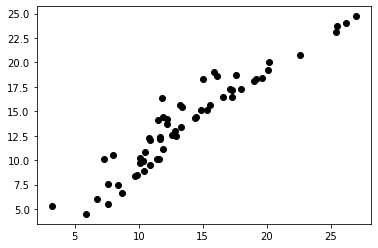

In [12]:
from sklearn.linear_model import LinearRegression

my_model = LinearRegression()

#fit the model using our data
my_model.fit(Xtrain, ytrain)


ypredicts = my_model.predict(Xtest)

print("The predicted sales:")
print(ypredicts)
print("The true sales:")
print(ytest)



plt.plot(ytest,ypredicts,'ok')
plt.show()
